In [2]:
import json
from utilities import plot_save_scores
%matplotlib inline

In [10]:
## PARAMETERS
start = 1
stop = 100
step = 1
walk_length = 50
num_walks = 25
num_nodes = 400
n_classes = 2
in_class_prob = 0.8
iterations = 10
p = 1.0
q = 1.0
# for saving purposes
file_name = 'evaluate_phase_change_{0}'.format(in_class_prob)
## NOTE: At p = 1 and q = 1, the Random Walk from node2vec is equivalent to the uniform DeepWalk (from the node2vec paper)

IndexError: list index out of range

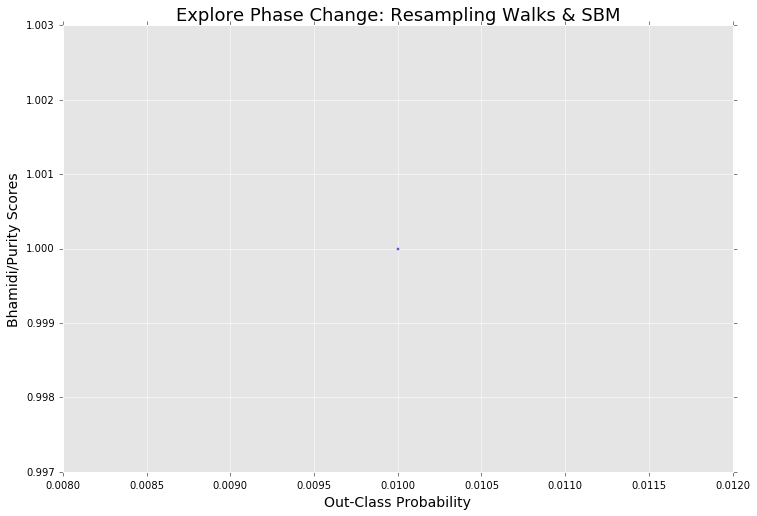

In [11]:
with open('../data/'+file_name+'.json', 'r') as fp:
    current_status = json.load(fp)
plot_save_scores(file_name=file_name, **current_status)